In [603]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

# 당뇨병 진행도 예측

In [604]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [605]:
df = pd.DataFrame(diabetes.data , columns = diabetes.feature_names)


In [606]:
raw = df.to_numpy()

In [607]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [608]:
from sklearn.model_selection import train_test_split

In [609]:
train_input , test_input , train_target , test_target = train_test_split(raw , diabetes.target , random_state = 42)

In [610]:
len(train_input)

331

In [611]:
len(train_target)

331

In [612]:
len(test_input)

111

In [613]:
#회귀모델 만들기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input , train_target)

LinearRegression()

In [614]:
test = lr.predict(test_input)

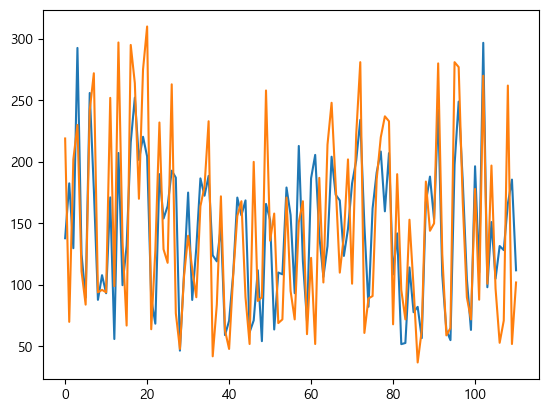

In [615]:
# 모델을 적용해서 test_input의 target을 예측한 값을 test에 담고 , 실제 target과 비교해보기
test = lr.predict(test_input)
plt.plot(test)
plt.plot(test_target)
plt.show()

- 너무 차이나는데...

In [616]:
lr.score(train_input , train_target)

0.5190341891679049

In [617]:
lr.score(test_input , test_target)

0.4849058889476756

- 점수가 너무 낮다.

In [618]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(lr.predict(test_input) , test_target)

In [619]:
mse

2848.3106508475053

## mse가 너무 높다. 성능이 나쁘다

In [620]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [621]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


- 상관성이 각각 너무 낮다.

In [622]:
df1 = df.iloc[:,[0,3,9]]

In [623]:
raw2 = df1.to_numpy()

In [624]:
train_input , test_input , train_target , test_target = train_test_split(raw , diabetes.target , random_state = 42)

In [625]:
lr = LinearRegression()
lr.fit(train_input , train_target)

LinearRegression()

In [626]:
lr.score(train_input , train_target)

0.5190341891679049

In [627]:
# 변수를 늘려보기
poly = PolynomialFeatures(include_bias = False , degree = 3)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [628]:
lr.fit(train_poly , train_target)
print(lr.score(train_poly , train_target))
print(lr.score(test_poly , test_target))

0.90983817573718
-55.921870574233004


- 과대적합 , 릿지와 라쏘 활용해보기

In [629]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_input , train_target)
print(ridge.score(train_input , train_target))
print(ridge.score(test_input , test_target))

0.42730211000433205
0.4384002973142447


In [630]:
train_score = []
test_score = []
for i in [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100]:
    ridge = Ridge(alpha = i)
    ridge.fit(train_input , train_target)
    train_score.append(ridge.score(train_input , train_target))
    test_score.append(ridge.score(test_input , test_target))

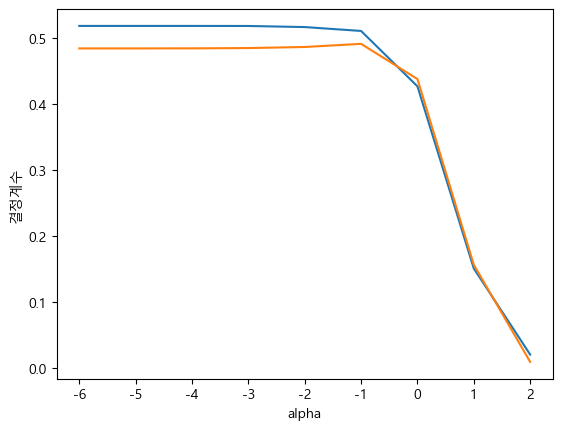

In [631]:
plt.plot(np.log10([0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100]) , train_score)
plt.plot(np.log10([0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100]) , test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수')
plt.show()

In [632]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_input , train_target)
print(lasso.score(train_input , train_target))
print(lasso.score(test_input , test_target))

0.34687336241711
0.3791413953419158


In [633]:
train_score = []
test_score = []
for i in [0.001 , 0.01 , 0.1 , 1 , 10 , 100]:
    lasso = Lasso(alpha = i)
    lasso.fit(train_input , train_target)
    train_score.append(lasso.score(train_input , train_target))
    test_score.append(lasso.score(test_input , test_target))

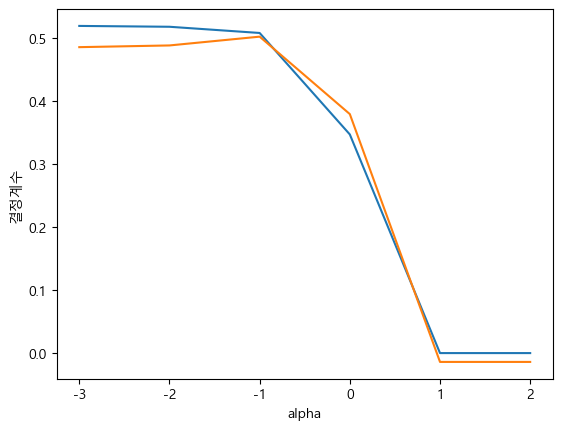

In [634]:
plt.plot(np.log10([0.001 , 0.01 , 0.1 , 1 , 10 , 100]) , train_score)
plt.plot(np.log10([0.001 , 0.01 , 0.1 , 1, 10 , 100]) , test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수')
plt.show()

In [635]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(train_input , train_target)
print(lasso.score(train_input , train_target))
print(lasso.score(test_input , test_target))

0.507826468555518
0.5019753487835408


In [636]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


# 보스턴 집값 예측

In [637]:
X , y = mglearn.datasets.load_extended_boston()
train_input , test_input , train_target , test_target = train_test_split(X , y , test_size = 0.3 , random_state= 20)

In [638]:
# 데이터를 보았을 때 , 0의 개수가 너무 많은 것들을 제거
x = pd.DataFrame(X).drop([1,3,8] , axis = 1).to_numpy()

In [639]:
#상관계수 확인
pd.DataFrame(x).corr()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621,...,0.603736,0.583831,0.356989,0.634765,0.310934,-0.027768,0.506050,-0.372994,0.220731,0.458726
1,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,...,0.708189,0.694027,0.560741,0.666853,0.427485,0.110998,0.600477,-0.387507,0.423440,0.521482
2,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,...,0.649671,0.604865,0.497426,0.655201,0.271909,-0.062746,0.495391,-0.411609,0.390434,0.521016
3,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,...,-0.271985,-0.307063,-0.246480,-0.423711,-0.344632,-0.236286,-0.542275,0.153335,-0.569364,-0.534571
4,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,...,0.498114,0.494434,0.382334,0.544471,0.333419,0.052092,0.558305,-0.298176,0.469398,0.511949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.027768,0.110998,-0.062746,-0.236286,0.052092,-0.015479,0.087699,0.719030,0.540779,0.072828,...,0.100447,0.241066,0.459430,0.047798,0.682018,1.000000,0.294607,0.530341,0.427794,0.016827
97,0.506050,0.600477,0.495391,-0.542275,0.558305,-0.481751,0.630946,0.658179,-0.373330,0.903510,...,0.642894,0.707647,0.426302,0.851305,0.686708,0.294607,1.000000,-0.379856,0.665545,0.858890
98,-0.372994,-0.387507,-0.411609,0.153335,-0.298176,0.310894,-0.454404,-0.164704,0.983192,-0.382479,...,-0.451259,-0.423100,0.157940,-0.480033,-0.196387,0.530341,-0.379856,1.000000,0.231030,-0.350837
99,0.220731,0.423440,0.390434,-0.569364,0.469398,-0.345454,0.293140,0.270669,0.264686,0.776234,...,0.283500,0.311091,0.517423,0.511726,0.291493,0.427794,0.665545,0.231030,1.000000,0.716782


In [640]:
#test 데이터의 점수가 너무 낮아 , size를 0.5로 올려보았다.
train_input , test_input , train_target , test_target = train_test_split(x , y , test_size = 0.5 , random_state= 20)

In [641]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input , train_target)

LinearRegression()

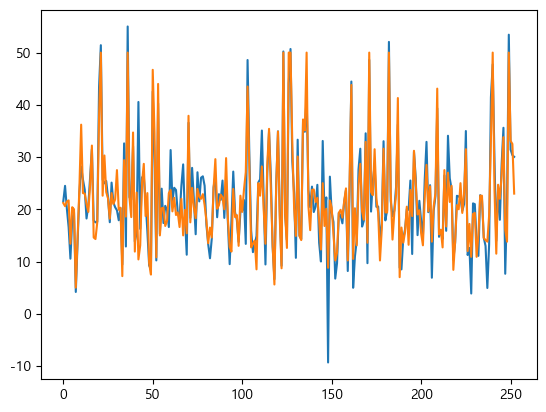

In [642]:
test = lr.predict(test_input)
plt.plot(test)
plt.plot(test_target)
plt.show()

In [643]:
lr.score(train_input , train_target)

0.9446400898336168

In [644]:

lr.score(test_input , test_target)

0.7955911953641852

In [645]:
poly = PolynomialFeatures(include_bias = False)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [646]:
lr.fit(train_poly , train_target)
print(lr.score(train_poly , train_target))
print(lr.score(test_poly , test_target))

1.0
-1.8050261418672213


In [647]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_input , train_target)
print(ridge.score(train_input , train_target))
print(ridge.score(test_input , test_target))

0.8533197390538276
0.8107040970157519


In [648]:
train_score = []
test_score = []
for i in [0.001 , 0.01 , 0.1 , 1 , 10 , 100]:
    lasso = Lasso(alpha = i)
    lasso.fit(train_input , train_target)
    train_score.append(lasso.score(train_input , train_target))
    test_score.append(lasso.score(test_input , test_target))

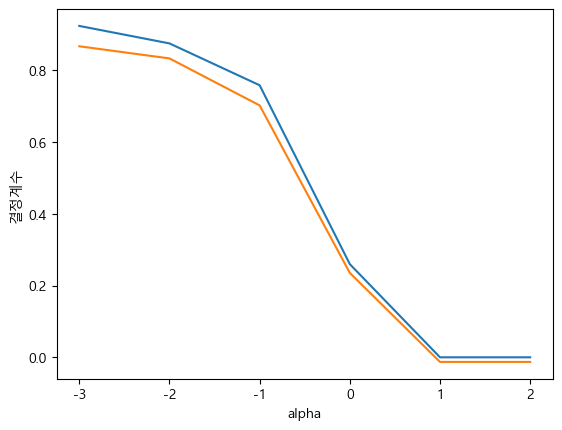

In [649]:
plt.plot(np.log10([0.001 , 0.01 , 0.1 , 1 , 10 , 100]) , train_score)
plt.plot(np.log10([0.001 , 0.01 , 0.1 , 1, 10 , 100]) , test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수')
plt.show()

In [650]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_input , train_target)
print(lasso.score(train_input , train_target))
print(lasso.score(test_input , test_target))

0.25971564078597364
0.23526920018529962


In [651]:
train_score = []
test_score = []
for i in [0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100]:
    lasso = Lasso(alpha = i)
    lasso.fit(train_input , train_target)
    train_score.append(lasso.score(train_input , train_target))
    test_score.append(lasso.score(test_input , test_target))

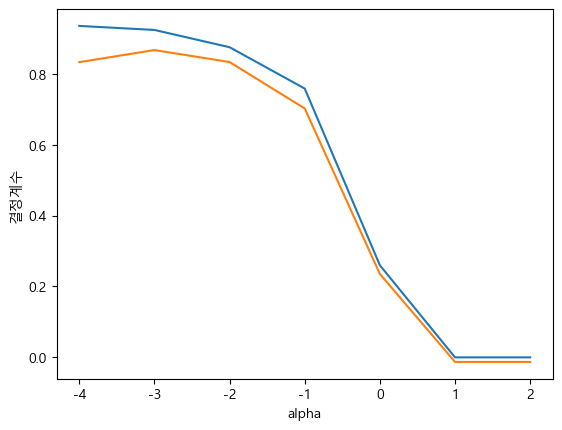

In [652]:
plt.plot(np.log10([0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100]) , train_score)
plt.plot(np.log10([0.0001 , 0.001 , 0.01 , 0.1 , 1, 10 , 100]) , test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수')
plt.show()

In [653]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(train_input , train_target)
print(lasso.score(train_input , train_target))
print(lasso.score(test_input , test_target))

0.9237251470881582
0.8669762750880734


# 결론
 - 당뇨병 수치 판단 자료는 점수가 너무 낮게 나온다.(최대점수 0.5)
 - 보스턴은 0.9237251470881582 , 0.8669762750880734의 점수였다. 과대적합이 일어났다고 볼 수 있다.

In [654]:
#boston 데이터 불러오기
boston = pd.read_csv('BostonHousing.csv')

In [655]:
#집값을 제외한 것들
boston.iloc[:,:-1]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [656]:
#집값을 제외한 것들과 집값을 훈련 , 테스트로 나누기
train_input , test_input , train_target , test_target = train_test_split(boston.iloc[:,:-1].to_numpy() , boston['medv'] , test_size = 0.3 , random_state= 20)

In [657]:
poly = PolynomialFeatures(include_bias = False , degree = 5)
train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [658]:
lr.fit(train_poly , train_target)
print(lr.score(train_poly , train_target))
print(lr.score(test_poly , test_target))

1.0
-544.4273353229181


In [659]:
# 평균과 표준편차를 이용하여 특성의 스케일을 표준점수로 변경
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [660]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled , train_target)

LinearRegression()

In [661]:
lr.score(train_scaled , train_target)

1.0

In [662]:
lr.score(test_scaled , test_target)

-7.858387605502939